In [1]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from scipy import stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_chfusd = pd.read_csv('/content/CHF-USD Exchange Rate Clean.csv')
df_trends = pd.read_excel('/content/World_GT_Full.xlsx')

In [3]:
df_trends['Date'] = pd.to_datetime(df_trends.iloc[:, 0], infer_datetime_format=True)
df_chfusd['Date'] = pd.to_datetime(df_chfusd.iloc[:, 0], infer_datetime_format=True)

In [4]:
df_trends.iloc[:,1:] = df_trends.iloc[:,1:].diff()
df_trends

,Date,swiss franc,Europe,EUR,Switzerland,CHF,NASDAQ,S&P500,VIX,volatility,Germany,UK,sterling pound,GBP,Greece,Italy,Spain,France,DAX,unemployment,recession,euro,crisis,fed,finance,financial crisis,federal reserve,gold,inflation,treasuries,OPEC,contagion,corruption,disaster,futures,forwards,president,parliament,aid,EU,...,steel,silver,bronze,corn,commodities,natural gas,agriculture,emerging market,trade,interest rate,GDP,exports,imports,jobs,tax,tariff,uncertainty,gini,inequality,insurance,pension,liquidity,diversification,alpha,currency,CAPM,fixed income,commission,SEC,yield,real estate,eurodollar,regulations,deficit,yield curve,LIBOR,2008,bubble,energy,1939
0,2004-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-01-02,0.0,16.0,9.0,2.0,-1.0,10.0,-27.0,17.0,31.0,1.0,-2.0,0.0,1.0,-4.0,-1.0,-2.0,-6.0,2.0,2.0,0.0,-1.0,-6.0,7.0,20.0,0.0,0.0,1.0,19.0,0.0,8.0,0.0,-58.0,-1.0,3.0,-24.0,0.0,-3.0,10.0,0.0,...,-2.0,-13.0,-34.0,-13.0,18.0,19.0,6.0,0.0,-5.0,14.0,-5.0,25.0,11.0,2.0,5.0,34.0,15.0,-11.0,0.0,24.0,-13.0,0.0,-8.0,6.0,6.0,0.0,0.0,5.0,-3.0,35.0,10.0,0.0,-4.0,8.0,0.0,8.0,0.0,-16.0,6.0,10.0
2,2004-01-03,0.0,0.0,-10.0,-3.0,0.0,-6.0,0.0,-19.0,-31.0,-1.0,-3.0,0.0,-1.0,-1.0,0.0,-3.0,4.0,-2.0,0.0,0.0,0.0,5.0,-4.0,-16.0,0.0,10.0,-1.0,-6.0,0.0,-6.0,0.0,2.0,10.0,-7.0,30.0,0.0,0.0,-6.0,0.0,...,6.0,8.0,4.0,-1.0,-21.0,2.0,1.0,0.0,-4.0,-16.0,25.0,12.0,-21.0,-1.0,-6.0,-17.0,-3.0,0.0,0.0,-16.0,2.0,0.0,-8.0,-2.0,0.0,0.0,17.0,-5.0,8.0,-25.0,-2.0,0.0,8.0,7.0,0.0,-14.0,0.0,13.0,7.0,32.0
3,2004-01-04,19.0,-12.0,2.0,7.0,1.0,3.0,22.0,12.0,0.0,1.0,0.0,26.0,1.0,2.0,0.0,11.0,-5.0,1.0,1.0,2.0,0.0,0.0,-3.0,-3.0,0.0,-19.0,1.0,-8.0,0.0,2.0,0.0,7.0,-5.0,5.0,-38.0,0.0,0.0,-1.0,1.0,...,-5.0,-6.0,13.0,2.0,8.0,-16.0,3.0,14.0,5.0,7.0,3.0,-36.0,-25.0,2.0,1.0,23.0,8.0,5.0,10.0,-6.0,8.0,27.0,0.0,-5.0,7.0,0.0,-17.0,4.0,-2.0,1.0,5.0,0.0,-14.0,-9.0,0.0,7.0,0.0,18.0,5.0,-39.0
4,2004-01-05,-19.0,-7.0,-4.0,-8.0,-3.0,-5.0,-22.0,18.0,0.0,-3.0,-50.0,-26.0,-1.0,-2.0,1.0,-14.0,-16.0,-2.0,0.0,-2.0,-2.0,9.0,1.0,13.0,0.0,-3.0,9.0,2.0,0.0,-4.0,0.0,-15.0,5.0,-7.0,0.0,2.0,-1.0,-6.0,-2.0,...,-4.0,4.0,2.0,-6.0,1.0,17.0,25.0,-14.0,1.0,28.0,51.0,5.0,-16.0,4.0,5.0,-17.0,-20.0,9.0,49.0,4.0,-37.0,-27.0,0.0,11.0,11.0,0.0,0.0,9.0,35.0,13.0,11.0,0.0,7.0,38.0,0.0,-16.0,0.0,-38.0,-3.0,-6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6465,2021-09-13,-1.0,0.0,4.0,0.0,6.0,32.0,17.0,8.0,3.0,1.0,-2.0,1.0,1.0,-1.0,0.0,0.0,1.0,13.0,2.0,0.0,1.0,2.0,7.0,35.0,0.0,4.0,-1.0,7.0,2.0,-1.0,-1.0,3.0,2.0,10.0,0.0,0.0,3.0,5.0,0.0,...,5.0,0.0,-1.0,-6.0,21.0,12.0,2.0,0.0,-7.0,3.0,5.0,9.0,1.0,2.0,8.0,8.0,2.0,2.0,5.0,15.0,17.0,2.0,-1.0,2.0,2.0,2.0,1.0,2.0,-1.0,10.0,1.0,0.0,6.0,1.0,0.0,2.0,0.0,-8.0,22.0,-2.0
6466,2021-09-14,1.0,0.0,0.0,0.0,-1.0,2.0,0.0,-2.0,-1.0,0.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-4.0,1.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,6.0,1.0,1.0,0.0,2.0,2.0,-1.0,0.0,-1.0,-1.0,0.0,0.0,...,-1.0,-1.0,1.0,0.0,30.0,5.0,1.0,2.0,-3.0,2.0,-1.0,-7.0,1.0,0.0,3.0,-1.0,-1.0,0.0,0.0,1.0,-2.0,1.0,1.0,-1.0,2.0,2.0,0.0,1.0,0.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,4.0,-1.0
6467,2021-09-15,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,-7.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,3.0,1.0,-1.0,0.0,-12.0,0.0,0.0,-1.0,1.0,-1.0,4.0,11.0,-1.0,0.0,0.0,7.0,4.0,1.0,1.0,3.0,-2.0,0.0,-1.0,2.0,7.0,1.0,2.0,0.0,0.0,-4.0,0.0,0.0,0.0,-7.0,-1.0,0.0,0.0,0.0,2.0,3.0
6468,2021-09-16,0.0,0.0,0.0,-1.0,-2.0,-5.0,-4.0,-1.0,-1.0,-

In [5]:
ts_df = df_chfusd.merge(df_trends, how = 'inner', on = ['Date'])

In [6]:
ts_df = ts_df.drop(['Adj Close'], axis = 1)
ts_df = ts_df.set_index(ts_df.iloc[:,0])
ts_df = ts_df.drop(['Date'], axis = 1)
ts_df = ts_df.iloc[1:,:]
ts_df

,Log_Difference,swiss franc,Europe,EUR,Switzerland,CHF,NASDAQ,S&P500,VIX,volatility,Germany,UK,sterling pound,GBP,Greece,Italy,Spain,France,DAX,unemployment,recession,euro,crisis,fed,finance,financial crisis,federal reserve,gold,inflation,treasuries,OPEC,contagion,corruption,disaster,futures,forwards,president,parliament,aid,EU,...,steel,silver,bronze,corn,commodities,natural gas,agriculture,emerging market,trade,interest rate,GDP,exports,imports,jobs,tax,tariff,uncertainty,gini,inequality,insurance,pension,liquidity,diversification,alpha,currency,CAPM,fixed income,commission,SEC,yield,real estate,eurodollar,regulations,deficit,yield curve,LIBOR,2008,bubble,energy,1939
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-01-02,0.000242,0.0,16.0,9.0,2.0,-1.0,10.0,-27.0,17.0,31.0,1.0,-2.0,0.0,1.0,-4.0,-1.0,-2.0,-6.0,2.0,2.0,0.0,-1.0,-6.0,7.0,20.0,0.0,0.0,1.0,19.0,0.0,8.0,0.0,-58.0,-1.0,3.0,-24.0,0.0,-3.0,10.0,0.0,...,-2.0,-13.0,-34.0,-13.0,18.0,19.0,6.0,0.0,-5.0,14.0,-5.0,25.0,11.0,2.0,5.0,34.0,15.0,-11.0,0.0,24.0,-13.0,0.0,-8.0,6.0,6.0,0.0,0.0,5.0,-3.0,35.0,10.0,0.0,-4.0,8.0,0.0,8.0,0.0,-16.0,6.0,10.0
2004-01-05,0.006472,-19.0,-7.0,-4.0,-8.0,-3.0,-5.0,-22.0,18.0,0.0,-3.0,-50.0,-26.0,-1.0,-2.0,1.0,-14.0,-16.0,-2.0,0.0,-2.0,-2.0,9.0,1.0,13.0,0.0,-3.0,9.0,2.0,0.0,-4.0,0.0,-15.0,5.0,-7.0,0.0,2.0,-1.0,-6.0,-2.0,...,-4.0,4.0,2.0,-6.0,1.0,17.0,25.0,-14.0,1.0,28.0,51.0,5.0,-16.0,4.0,5.0,-17.0,-20.0,9.0,49.0,4.0,-37.0,-27.0,0.0,11.0,11.0,0.0,0.0,9.0,35.0,13.0,11.0,0.0,7.0,38.0,0.0,-16.0,0.0,-38.0,-3.0,-6.0
2004-01-06,0.000081,0.0,34.0,5.0,2.0,2.0,21.0,0.0,-20.0,30.0,5.0,77.0,0.0,0.0,9.0,0.0,7.0,25.0,2.0,3.0,0.0,3.0,-6.0,8.0,46.0,0.0,27.0,-8.0,44.0,0.0,3.0,0.0,41.0,-7.0,16.0,0.0,0.0,8.0,10.0,3.0,...,14.0,-5.0,4.0,16.0,11.0,-11.0,-14.0,12.0,20.0,-18.0,-69.0,22.0,13.0,-2.0,2.0,36.0,10.0,-9.0,-42.0,50.0,48.0,15.0,11.0,2.0,8.0,22.0,39.0,5.0,2.0,1.0,-28.0,15.0,46.0,-4.0,74.0,75.0,0.0,6.0,32.0,30.0
2004-01-07,-0.006150,0.0,-13.0,-3.0,1.0,2.0,-3.0,0.0,-10.0,2.0,-2.0,-21.0,0.0,0.0,-1.0,1.0,7.0,-9.0,-1.0,-2.0,1.0,0.0,6.0,14.0,-16.0,0.0,1.0,1.0,-23.0,0.0,3.0,0.0,-32.0,3.0,-10.0,8.0,0.0,-4.0,-2.0,-1.0,...,-2.0,2.0,-10.0,-9.0,-7.0,29.0,18.0,-3.0,2.0,-2.0,18.0,-2.0,9.0,0.0,2.0,-25.0,17.0,-1.0,2.0,-24.0,-33.0,14.0,-11.0,-9.0,1.0,-12.0,19.0,-2.0,-24.0,-8.0,6.0,-4.0,-22.0,-10.0,-34.0,-50.0,0.0,2.0,3.0,-25.0
2004-01-08,0.010462,0.0,7.0,5.0,1.0,-2.0,16.0,0.0,6.0,-21.0,-1.0,3.0,8.0,0.0,-5.0,0.0,3.0,4.0,3.0,-3.0,0.0,-1.0,-7.0,-8.0,-8.0,2.0,-5.0,-2.0,0.0,0.0,-2.0,0.0,-5.0,0.0,12.0,15.0,0.0,2.0,3.0,1.0,...,2.0,-4.0,5.0,3.0,5.0,-8.0,-11.0,-9.0,8.0,6.0,-8.0,9.0,18.0,-2.0,-3.0,16.0,3.0,2.0,25.0,5.0,18.0,-11.0,0.0,-5.0,-1.0,-10.0,-20.0,-3.0,-13.0,5.0,-5.0,-11.0,21.0,18.0,-40.0,26.0,0.0,-1.0,-7.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-08,-0.004983,0.0,1.0,-1.0,2.0,1.0,5.0,-7.0,4.0,0.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,-3.0,1.0,-4.0,1.0,0.0,-1.0,-1.0,-2.0,0.0,1.0,1.0,1.0,0.0,-1.0,0.0,-5.0,-1.0,-1.0,0.0,1.0,-1.0,-1.0,0.0,...,2.0,1.0,0.0,-2.0,-4.0,5.0,1.0,-1.0,-2.0,-4.0,-1.0,-4.0,1.0,0.0,-1.0,-2.0,4.0,2.0,2.0,2.0,-5.0,4.0,0.0,-3.0,1.0,-2.0,-1.0,0.0,-3.0,4.0,1.0,0.0,1.0,-4.0,0.0,0.0,0.0,0.0,4.0,1.0
2021-09-09,-0.002596,-1.0,-3.0,0.0,-2.0,-1.0,0.0,8.0,-2.0,0.0,0.0,0.0,-1.0,0.0,-2.0,0.0,-1.0,-3.0,3.0,-3.0,0.0,0.0,1.0,2.0,-4.0,2.0,0.0,-2.0,-4.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,-1.0,1.0,0.0,...,-3.0,-1.0,3.0,-1.0,-13.0,-4.0,2.0,1.0,1.0,-1.0,0.0,3.0,2.0,0.0,-1.0,0.0,-4.0,-1.0,1.0,-2.0,-7.0,-3.0,0.0,-1.0,0.0,5.0,-1.0,0.0,0.0,-1.0,-1.0,1.0,0.0,17.0,1.0,-1.0,0.0,1.0,-4.0,-1.0
2021-09-10,0.005799,0.0,-3.0,-1.0,-1.0,-1.0,-4.0,-4.0,-6.0,-2.0,-1.0,-1.0,-1.0,-1.0,-2.0,0.0,0.0,-1.0,-4.0,-2.0,-1.0,0.0,-2.0,-1.0,-6.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.0,-1.0,-

#PCA Analysis:

In [7]:
X = ts_df.iloc[:,1:]

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


PCA(n_components=5)

In [9]:
print(pca.explained_variance_)

[1803.35057934  211.99908276  130.85203226  115.4312439   107.17428871]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


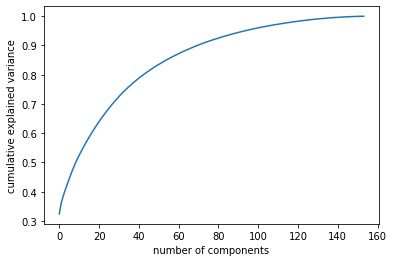

In [10]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [11]:
X_array_new = pca.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [12]:
X_array_new.shape

(4618, 154)

In [13]:
X_rec = pca.inverse_transform(X_array_new)

In [14]:
X_rec.shape

(4618, 154)

Text(0.5, 1.0, 'Original image without standardising')

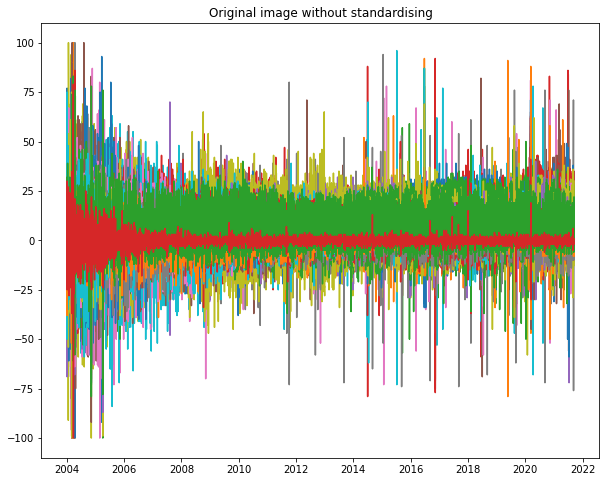

In [15]:
plt.figure(figsize=(10,8))
plt.plot(X)
plt.title("Original image without standardising")

Text(0.5, 1.0, 'Reconstructed image after PCA')

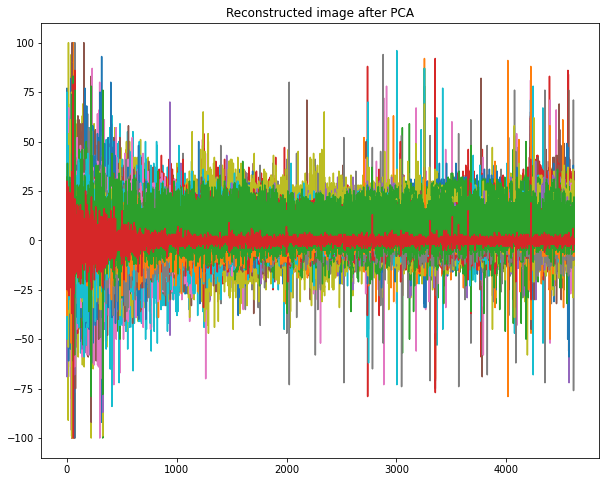

In [16]:
plt.figure(figsize=(10,8))
plt.plot(X_rec)
plt.title("Reconstructed image after PCA")

In [17]:
principal_components = pd.DataFrame(X_rec)

In [18]:
principal_components

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153
0,3.108624e-15,1.600000e+01,9.000000e+00,2.000000e+00,-1.0,1.000000e+01,-2.700000e+01,17.0,3.100000e+01,1.000000e+00,-2.000000e+00,3.802514e-14,1.000000e+00,-4.0,-1.000000e+00,-2.000000e+00,-6.000000e+00,2.0,2.000000e+00,2.856049e-14,-1.000000e+00,-6.0,7.000000e+00,2.000000e+01,4.319461e-14,-4.063416e-14,1.000000e+00,1.900000e+01,-7.049916e-15,8.000000e+00,1.655620e-14,-58.0,-1.000000e+00,3.000000e+00,-2.400000e+01,3.601286e-14,-3.000000e+00,1.000000e+01,-3.177320e-14,-3.147482e-14,...,-2.0,-1.300000e+01,-3.400000e+01,-1.300000e+01,18.0,19.0,6.0,2.095546e-15,-5.0,14.0,-5.000000e+00,25.0,11.0,2.000000e+00,5.0,3.400000e+01,15.0,-1.100000e+01,-5.723200e-14,24.0,-13.0,-7.549517e-15,-8.000000e+00,6.0,6.000000e+00,-4.996004e-14,7.660539e-15,5.000000e+00,-3.000000e+00,35.0,10.0,-2.686740e-14,-4.000000e+00,8.0,2.228218e-13,8.000000e+00,-2.455675e-14,-1.600000e+01,6.0,10.0
1,-1.900000e+01,-7.000000e+00,-4.000000e+00,-8.000000e+00,-3.0,-5.000000e+00,-2.200000e+01,18.0,1.509903e-14,-3.000000e+00,-5.000000e+01,-2.600000e+01,-1.000000e+00,-2.0,1.000000e+00,-1.400000e+01,-1.600000e+01,-2.0,-3.808065e-14,-2.000000e+00,-2.000000e+00,9.0,1.000000e+00,1.300000e+01,-1.412065e-14,-3.000000e+00,9.000000e+00,2.000000e+00,-7.116530e-14,-4.000000e+00,-1.039446e-14,-15.0,5.000000e+00,-7.000000e+00,-5.143108e-14,2.000000e+00,-1.000000e+00,-6.000000e+00,-2.000000e+00,-4.000000e+00,...,-4.0,4.000000e+00,2.000000e+00,-6.000000e+00,1.0,17.0,25.0,-1.400000e+01,1.0,28.0,5.100000e+01,5.0,-16.0,4.000000e+00,5.0,-1.700000e+01,-20.0,9.000000e+00,4.900000e+01,4.0,-37.0,-2.700000e+01,1.103683e-13,11.0,1.100000e+01,-2.278733e-14,-7.316370e-14,9.000000e+00,3.500000e+01,13.0,11.0,2.858824e-15,7.000000e+00,38.0,-5.451195e-14,-1.600000e+01,-1.790235e-15,-3.800000e+01,-3.0,-6.0
2,6.952772e-15,3.400000e+01,5.000000e+00,2.000000e+00,2.0,2.100000e+01,2.731149e-14,-20.0,3.000000e+01,5.000000e+00,7.700000e+01,2.842171e-14,-1.261213e-13,9.0,-6.519785e-14,7.000000e+00,2.500000e+01,2.0,3.000000e+00,-4.610201e-14,3.000000e+00,-6.0,8.000000e+00,4.600000e+01,1.783990e-14,2.700000e+01,-8.000000e+00,4.400000e+01,-3.708145e-14,3.000000e+00,1.865869e-14,41.0,-7.000000e+00,1.600000e+01,-2.299549e-14,2.484124e-15,8.000000e+00,1.000000e+01,3.000000e+00,7.000000e+00,...,14.0,-5.000000e+00,4.000000e+00,1.600000e+01,11.0,-11.0,-14.0,1.200000e+01,20.0,-18.0,-6.900000e+01,22.0,13.0,-2.000000e+00,2.0,3.600000e+01,10.0,-9.000000e+00,-4.200000e+01,50.0,48.0,1.500000e+01,1.100000e+01,2.0,8.000000e+00,2.200000e+01,3.900000e+01,5.000000e+00,2.000000e+00,1.0,-28.0,1.500000e+01,4.600000e+01,-4.0,7.400000e+01,7.500000e+01,1.289940e-14,6.000000e+00,32.0,30.0
3,-6.022960e-15,-1.300000e+01,-3.000000e+00,1.000000e+00,2.0,-3.000000e+00,-1.920686e-14,-10.0,2.000000e+00,-2.000000e+00,-2.100000e+01,-2.250977e-14,2.511880e-14,-1.0,1.000000e+00,7.000000e+00,-9.000000e+00,-1.0,-2.000000e+00,1.000000e+00,-1.017242e-14,6.0,1.400000e+01,-1.600000e+01,-8.486267e-15,1.000000e+00,1.000000e+00,-2.300000e+01,3.669287e-14,3.000000e+00,-3.226586e-15,-32.0,3.000000e+00,-1.000000e+01,8.000000e+00,-2.373102e-14,-4.000000e+00,-2.000000e+00,-1.000000e+00,-7.000000e+00,...,-2.0,2.000000e+00,-1.000000e+01,-9.000000e+00,-7.0,29.0,18.0,-3.000000e+00,2.0,-2.0,1.800000e+01,-2.0,9.0,3.080869e-15,2.0,-2.500000e+01,17.0,-1.000000e+00,2.000000e+00,-24.0,-33.0,1.400000e+01,-1.100000e+01,-9.0,1.000000e+00,-1.200000e+01,1.900000e+01,-2.000000e+00,-2.400000e+01,-8.0,6.0,-4.000000e+00,-2.200000e+01,-10.0,-3.400000e+01,-5.000000e+01,-9.117707e-15,2.000000e+00,3.0,-25.0
4,3.344547e-15,7.000000e+00,5.000000e+00,1.000000e+00,-2.0,1.600000e+01,2.453593e-14,6.0,-2.100000e+01,-1.000000e+00,3.000000e+00,8.000000e+00,-2.955969e-14,-5.0,4.871104e-15,3.000000e+00,4.000000e+00,3.0,-3

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Text(0.5, 1.0, 'Reconstructed image after PCA')

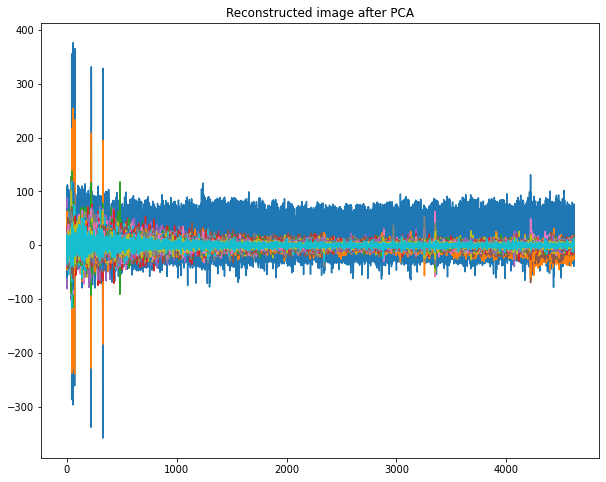

In [19]:
import plotly.express as px

pca = PCA(n_components=40)
components = pca.fit_transform(X)

plt.figure(figsize=(10,8))
plt.plot(components)
plt.title("Reconstructed image after PCA")

Text(0.5, 1.0, 'Reconstructed image after PCA')

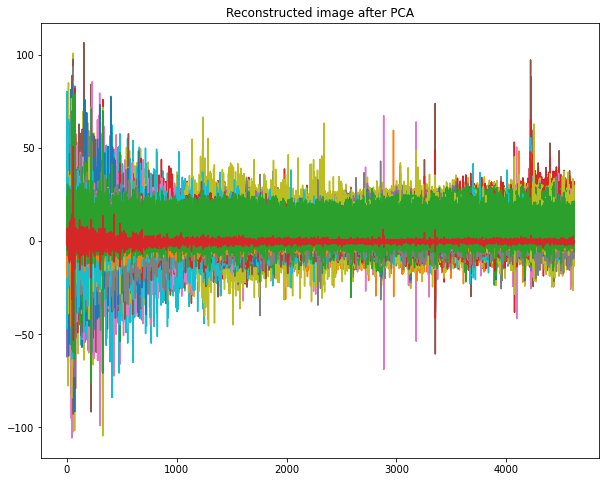

In [20]:
components_rec = pca.inverse_transform(components)

plt.figure(figsize=(10,8))
plt.plot(components_rec)
plt.title("Reconstructed image after PCA")

In [21]:
comp = pd.DataFrame(components)
comp.index = ts_df.index
comp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-01-02,76.573702,-5.174860,30.671078,0.354656,-11.589228,5.924096,-0.206893,9.223775,0.663172,-11.879601,-27.662702,-16.285223,-31.020837,23.970125,-22.375550,-25.788142,11.229338,-10.728422,19.261607,8.012487,-10.834101,27.614365,-51.880211,13.659918,-26.108337,3.341561,-2.671577,-29.372359,-14.943028,6.996961,-7.522046,-13.512555,12.744777,34.386275,-9.522221,0.624636,11.181717,-7.886370,-9.890994,-2.374109
2004-01-05,21.818021,22.268035,-20.888497,1.507360,-21.307583,16.755308,-11.492983,11.738142,35.202264,-0.318695,-49.919444,39.654802,-10.961902,-25.510192,-81.011125,13.230931,-1.669860,25.580643,-10.748989,-13.945916,-21.516105,24.176204,-32.081591,17.043752,0.498186,-24.184571,15.260469,20.666384,9.633633,0.931409,67.084527,-15.494578,0.213297,10.637360,-39.732822,-30.747592,17.651645,5.462851,14.262975,4.612561
2004-01-06,108.693886,28.445872,81.433411,10.405484,36.247123,2.382233,12.188628,-2.584926,7.955250,3.100531,51.900621,-50.648099,14.363899,5.146657,87.564227,21.186874,27.123733,-17.986585,26.654931,-20.737486,-43.634072,-20.115759,45.908931,-27.706434,-21.632206,49.196343,-50.486370,-0.754435,-9.846290,-19.283380,-61.259755,63.220386,13.678214,24.970884,24.107173,31.393249,15.123009,2.085949,-16.798416,-19.996089
2004-01-07,-57.458228,-7.544663,-18.549026,-4.506890,-27.019903,-3.538671,2.830785,-3.591442,-4.663580,28.683308,-14.499913,1.302653,10.695550,-1.447970,-27.455254,-10.605864,10.252495,-12.348918,-5.931449,11.349553,65.814542,4.527861,-19.236956,-1.859005,18.823278,-21.697047,7.826918,-31.232495,-4.070862,12.819720,8.091498,-45.983688,-5.405287,-24.985302,15.108063,12.105287,-22.904994,-0.230693,10.531195,18.128961
2004-01-08,-3.018232,-2.845913,-8.204593,-16.935084,26.196841,-6.837116,4.370753,8.898384,3.148218,-26.775768,5.759515,-2.614624,0.138305,5.338957,26.498577,14.926549,-3.134102,8.221763,-22.612995,31.231870,-3.375144,-32.196284,-34.435173,12.956683,-0.260035,-7.493094,13.366721,-2.833299,4.661858,-19.843424,2.045539,16.097141,-6.031276,13.709034,22.581732,-3.248198,-1.731562,-23.431515,-1.602133,19.839816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-08,-16.639650,7.557313,0.007412,1.275180,-2.064412,0.699492,2.753607,0.552096,-1.307906,1.853530,-0.327537,0.902046,-0.264189,2.155572,-2.657528,2.246040,2.334227,6.445133,-0.195171,-1.428799,0.061781,6.567340,-3.858079,-2.394003,6.715558,-3.155173,-1.511841,-3.489500,-2.880618,-2.422103,-3.555716,-3.278776,4.001774,3.348287,3.902190,-1.287737,-0.399526,-0.701138,5.302040,3.646117
2021-09-09,-18.659918,9.239290,-1.833602,-2.093761,-2.569195,-12.611675,0.102080,3.147571,8.943746,-0.234259,-1.304475,5.286943,-1.514876,-8.981008,2.649667,7.347992,5.239177,-1.898826,-1.623037,-7.487272,-6.363675,-7.169273,-2.313092,10.198917,-7.382191,1.335231,-2.717682,-6.431210,4.450991,2.982497,1.343199,2.348569,1.062145,-2.305968,-2.077652,-2.005113,3.294053,-0.767115,0.878743,4.994993
2021-09-10,-39.210422,-2.145997,1.434655,2.440777,4.523233,13.908950,-0.102640,-0.935582,-6.396325,-0.358060,-3.089841,-2.228989,-0.562907,0.805901,-3.016389,-4.308050,-1.310587,0.084744,-0.476547,3.222672,0.471741,2.259396,0.806644,-2.760938,0.867299,-2.016497,-0.363122,0.944194,-0.181189,-3.254137,2.642112,-3.126793,0.145283,5.800836,2.532807,-0.486588,-2.502701,0.891821,-3.294068,-0.667607


#Wrapper Sequential Feature Selection (SFS) Algorithm

In [22]:
#clf = svm.SVC()

# Build step forward feature selection
#sfs1 = sfs(clf,
#           k_features=15,
#           forward=True,
#           floating=False,
#           verbose=2,
#           scoring='accuracy',
#           cv=5)

# Perform SFFS
#sfs1 = sfs1.fit(X_Train, Y_Train)

#feat_cols = list(sfs1.k_feature_idx_)
#print(feat_cols)

NameError: ignored

#VAR with Components

<Figure size 864x432 with 0 Axes>

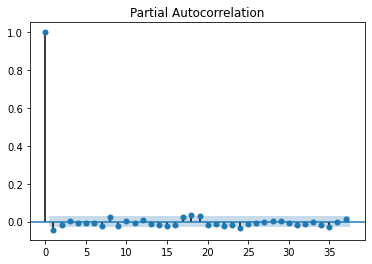

In [23]:
#PACF
plt.figure(figsize=(12,6))
plot_pacf(ts_df['Log_Difference'])
plt.show()

In [24]:
VAR_ts_df = pd.concat([ts_df['Log_Difference'],comp], axis=1)

In [25]:
model = VAR(VAR_ts_df)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



In [26]:
model_fit = model.fit(maxlags=13)

In [27]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 17, Nov, 2021
Time:                     00:26:31
--------------------------------------------------------------------
No. of Equations:         41.0000    BIC:                    167.215
Nobs:                     4605.00    HQIC:                   147.388
Log likelihood:          -560578.    FPE:                2.25083e+59
AIC:                      136.621    Det(Omega_mle):     2.50458e+57
--------------------------------------------------------------------
Results for equation Log_Difference
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.000070         0.000102            0.684           0.494
L1.Log_Difference         -0.036558         0.015699           -2.329           0.020
L1.0                       0.00

#VAR With Most Significant Variables According to T-Test

In [28]:
from scipy import stats

In [29]:
statistic = []
p_value = []
trend_names = list(ts_df.columns)

In [30]:
for column in ts_df:
  t_test = stats.ttest_ind(ts_df['Log_Difference'], ts_df[column])
  statistic.append(t_test[0])
  p_value.append(t_test[1])

In [31]:
t_tests = pd.DataFrame(columns=['Trend Name','Statistic','p-value'])
t_tests['p-value'] = p_value
t_tests['Statistic'] = statistic
t_tests['Trend Name'] = trend_names

In [32]:
t_tests

,Trend Name,Statistic,p-value
0,Log_Difference,0.000000,1.000000e+00
1,swiss franc,-1.506178,1.320556e-01
2,Europe,-0.682608,4.948719e-01
3,EUR,-12.298563,1.715319e-34
4,Switzerland,0.285795,7.750416e-01
...,...,...,...
150,LIBOR,-9.014100,2.381298e-19
151,2008,1.779360,7.521359e-02
152,bubble,0.262245,7.931382e-01
153,energy,-20.358880,3.623429e-90


In [35]:
t_tests.dtypes

Trend Name     object
Statistic     float64
p-value       float64
dtype: object

In [36]:
#Significant Trends only

#above_35 = titanic[titanic["Age"] > 35]
#above_35.head()

signifi = t_tests[t_tests['p-value'] < 0.05]
signifi_sorted = signifi.sort_values(by='p-value', ascending=True)
signifi_sorted.head(30)

,Trend Name,Statistic,p-value
85,credit,-31.016832,5.096771e-201
49,bank,-30.039030,3.126268e-189
24,finance,-26.688381,3.154134e-151
101,banking,-26.465271,7.842278e-149
103,office,-24.063880,3.756514e-124
94,transaction,-21.412300,2.597248e-99
134,insurance,-20.940926,3.614594e-95
6,NASDAQ,-20.473215,3.862138e-91
153,energy,-20.358880,3.623429e-90
86,default,-20.129627,3.116960e-88


#VAR(2)

In [37]:
ts_df

,Log_Difference,swiss franc,Europe,EUR,Switzerland,CHF,NASDAQ,S&P500,VIX,volatility,Germany,UK,sterling pound,GBP,Greece,Italy,Spain,France,DAX,unemployment,recession,euro,crisis,fed,finance,financial crisis,federal reserve,gold,inflation,treasuries,OPEC,contagion,corruption,disaster,futures,forwards,president,parliament,aid,EU,...,steel,silver,bronze,corn,commodities,natural gas,agriculture,emerging market,trade,interest rate,GDP,exports,imports,jobs,tax,tariff,uncertainty,gini,inequality,insurance,pension,liquidity,diversification,alpha,currency,CAPM,fixed income,commission,SEC,yield,real estate,eurodollar,regulations,deficit,yield curve,LIBOR,2008,bubble,energy,1939
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-01-02,0.000242,0.0,16.0,9.0,2.0,-1.0,10.0,-27.0,17.0,31.0,1.0,-2.0,0.0,1.0,-4.0,-1.0,-2.0,-6.0,2.0,2.0,0.0,-1.0,-6.0,7.0,20.0,0.0,0.0,1.0,19.0,0.0,8.0,0.0,-58.0,-1.0,3.0,-24.0,0.0,-3.0,10.0,0.0,...,-2.0,-13.0,-34.0,-13.0,18.0,19.0,6.0,0.0,-5.0,14.0,-5.0,25.0,11.0,2.0,5.0,34.0,15.0,-11.0,0.0,24.0,-13.0,0.0,-8.0,6.0,6.0,0.0,0.0,5.0,-3.0,35.0,10.0,0.0,-4.0,8.0,0.0,8.0,0.0,-16.0,6.0,10.0
2004-01-05,0.006472,-19.0,-7.0,-4.0,-8.0,-3.0,-5.0,-22.0,18.0,0.0,-3.0,-50.0,-26.0,-1.0,-2.0,1.0,-14.0,-16.0,-2.0,0.0,-2.0,-2.0,9.0,1.0,13.0,0.0,-3.0,9.0,2.0,0.0,-4.0,0.0,-15.0,5.0,-7.0,0.0,2.0,-1.0,-6.0,-2.0,...,-4.0,4.0,2.0,-6.0,1.0,17.0,25.0,-14.0,1.0,28.0,51.0,5.0,-16.0,4.0,5.0,-17.0,-20.0,9.0,49.0,4.0,-37.0,-27.0,0.0,11.0,11.0,0.0,0.0,9.0,35.0,13.0,11.0,0.0,7.0,38.0,0.0,-16.0,0.0,-38.0,-3.0,-6.0
2004-01-06,0.000081,0.0,34.0,5.0,2.0,2.0,21.0,0.0,-20.0,30.0,5.0,77.0,0.0,0.0,9.0,0.0,7.0,25.0,2.0,3.0,0.0,3.0,-6.0,8.0,46.0,0.0,27.0,-8.0,44.0,0.0,3.0,0.0,41.0,-7.0,16.0,0.0,0.0,8.0,10.0,3.0,...,14.0,-5.0,4.0,16.0,11.0,-11.0,-14.0,12.0,20.0,-18.0,-69.0,22.0,13.0,-2.0,2.0,36.0,10.0,-9.0,-42.0,50.0,48.0,15.0,11.0,2.0,8.0,22.0,39.0,5.0,2.0,1.0,-28.0,15.0,46.0,-4.0,74.0,75.0,0.0,6.0,32.0,30.0
2004-01-07,-0.006150,0.0,-13.0,-3.0,1.0,2.0,-3.0,0.0,-10.0,2.0,-2.0,-21.0,0.0,0.0,-1.0,1.0,7.0,-9.0,-1.0,-2.0,1.0,0.0,6.0,14.0,-16.0,0.0,1.0,1.0,-23.0,0.0,3.0,0.0,-32.0,3.0,-10.0,8.0,0.0,-4.0,-2.0,-1.0,...,-2.0,2.0,-10.0,-9.0,-7.0,29.0,18.0,-3.0,2.0,-2.0,18.0,-2.0,9.0,0.0,2.0,-25.0,17.0,-1.0,2.0,-24.0,-33.0,14.0,-11.0,-9.0,1.0,-12.0,19.0,-2.0,-24.0,-8.0,6.0,-4.0,-22.0,-10.0,-34.0,-50.0,0.0,2.0,3.0,-25.0
2004-01-08,0.010462,0.0,7.0,5.0,1.0,-2.0,16.0,0.0,6.0,-21.0,-1.0,3.0,8.0,0.0,-5.0,0.0,3.0,4.0,3.0,-3.0,0.0,-1.0,-7.0,-8.0,-8.0,2.0,-5.0,-2.0,0.0,0.0,-2.0,0.0,-5.0,0.0,12.0,15.0,0.0,2.0,3.0,1.0,...,2.0,-4.0,5.0,3.0,5.0,-8.0,-11.0,-9.0,8.0,6.0,-8.0,9.0,18.0,-2.0,-3.0,16.0,3.0,2.0,25.0,5.0,18.0,-11.0,0.0,-5.0,-1.0,-10.0,-20.0,-3.0,-13.0,5.0,-5.0,-11.0,21.0,18.0,-40.0,26.0,0.0,-1.0,-7.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-08,-0.004983,0.0,1.0,-1.0,2.0,1.0,5.0,-7.0,4.0,0.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,-3.0,1.0,-4.0,1.0,0.0,-1.0,-1.0,-2.0,0.0,1.0,1.0,1.0,0.0,-1.0,0.0,-5.0,-1.0,-1.0,0.0,1.0,-1.0,-1.0,0.0,...,2.0,1.0,0.0,-2.0,-4.0,5.0,1.0,-1.0,-2.0,-4.0,-1.0,-4.0,1.0,0.0,-1.0,-2.0,4.0,2.0,2.0,2.0,-5.0,4.0,0.0,-3.0,1.0,-2.0,-1.0,0.0,-3.0,4.0,1.0,0.0,1.0,-4.0,0.0,0.0,0.0,0.0,4.0,1.0
2021-09-09,-0.002596,-1.0,-3.0,0.0,-2.0,-1.0,0.0,8.0,-2.0,0.0,0.0,0.0,-1.0,0.0,-2.0,0.0,-1.0,-3.0,3.0,-3.0,0.0,0.0,1.0,2.0,-4.0,2.0,0.0,-2.0,-4.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,-1.0,1.0,0.0,...,-3.0,-1.0,3.0,-1.0,-13.0,-4.0,2.0,1.0,1.0,-1.0,0.0,3.0,2.0,0.0,-1.0,0.0,-4.0,-1.0,1.0,-2.0,-7.0,-3.0,0.0,-1.0,0.0,5.0,-1.0,0.0,0.0,-1.0,-1.0,1.0,0.0,17.0,1.0,-1.0,0.0,1.0,-4.0,-1.0
2021-09-10,0.005799,0.0,-3.0,-1.0,-1.0,-1.0,-4.0,-4.0,-6.0,-2.0,-1.0,-1.0,-1.0,-1.0,-2.0,0.0,0.0,-1.0,-4.0,-2.0,-1.0,0.0,-2.0,-1.0,-6.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.0,-1.0,-

In [38]:
subset_ts_df = ts_df[['Log_Difference', 'swiss franc']]

In [ ]:
model = VAR(subset_ts_df)

In [70]:
model_fit = model.fit(maxlags=10)

In [71]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 17, Nov, 2021
Time:                     00:47:17
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -7.18486
Nobs:                     4608.00    HQIC:                  -7.22287
Log likelihood:           3654.12    FPE:                0.000714797
AIC:                     -7.24351    Det(Omega_mle):     0.000708326
--------------------------------------------------------------------
Results for equation Log_Difference
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.000068         0.000102            0.669           0.503
L1.Log_Difference         -0.049983         0.014801           -3.377           0.001
L1.swiss franc             0.00

In [72]:
model_fit.exog_names

['const',
 'L1.Log_Difference',
 'L1.swiss franc',
 'L2.Log_Difference',
 'L2.swiss franc',
 'L3.Log_Difference',
 'L3.swiss franc',
 'L4.Log_Difference',
 'L4.swiss franc',
 'L5.Log_Difference',
 'L5.swiss franc',
 'L6.Log_Difference',
 'L6.swiss franc',
 'L7.Log_Difference',
 'L7.swiss franc',
 'L8.Log_Difference',
 'L8.swiss franc',
 'L9.Log_Difference',
 'L9.swiss franc',
 'L10.Log_Difference',
 'L10.swiss franc']

In [73]:
model_fit.coefs[9]

array([[ 4.30330971e-03, -4.93201547e-05],
       [-2.69776201e+00, -2.71970862e-02]])

In [77]:
model_fit.pvalues['Log_Difference'].round(3)

const                 0.503
L1.Log_Difference     0.001
L1.swiss franc        0.000
L2.Log_Difference     0.104
L2.swiss franc        0.027
L3.Log_Difference     0.955
L3.swiss franc        0.089
L4.Log_Difference     0.409
L4.swiss franc        0.954
L5.Log_Difference     0.809
L5.swiss franc        0.206
L6.Log_Difference     0.802
L6.swiss franc        0.022
L7.Log_Difference     0.211
L7.swiss franc        0.001
L8.Log_Difference     0.076
L8.swiss franc        0.340
L9.Log_Difference     0.265
L9.swiss franc        0.397
L10.Log_Difference    0.770
L10.swiss franc       0.059
Name: Log_Difference, dtype: float64

#Implementing VAR(2) Rolling

In [78]:
var_results = []

In [83]:
for column in ts_df:
  if(column=='Log_Difference'):
    pass
  else:
    print(column)

swiss franc
Europe
EUR
Switzerland
CHF
NASDAQ
S&P500
VIX
volatility
Germany
UK
sterling pound
GBP
Greece
Italy
Spain
France
DAX
unemployment
recession
euro
crisis
fed
finance
financial crisis
federal reserve
gold
inflation
treasuries
OPEC
contagion
corruption
disaster
futures
forwards
president
parliament
aid
EU
European Union
stimulus
capital gains
climate change
OECD
conflict
environment
ECB
SNB
bank
IMF
USD
US Dollar
China
US
MSCI
home
dividend
labor
buy
financial market
short selling
earnings
profit
derivative
buy and hold
oil
politics
invest
crash
nyse
water
consume
trader
housing
gain
investment
revenue
mortgage
house
dow jones
portfolio
travel
consumption
loss
credit
default
hedge
headlines
leverage
chance
money
society
war
transaction
cash
economy
stocks
forex
growth
culture
banking
markets
office
stock market
bonds
risk
sell
metals
economics
debt
war.1
pandemic
disease
meltdown
steel
silver
bronze
corn
commodities
natural gas
agriculture
emerging market
trade
interest rate
GDP

In [84]:
for column in ts_df:

  if(column=='Log_Difference'):
    pass
  else:
    subset_ts_df = ts_df[['Log_Difference', column]]
    model = VAR(subset_ts_df)
    model_fit = model.fit(maxlags=10)
    var_results.append(model_fit.pvalues['Log_Difference'].round(3))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred f

In [103]:
len(var_results)

154

In [128]:
var_results[0]

const                 0.503
L1.Log_Difference     0.001
L1.swiss franc        0.000
L2.Log_Difference     0.104
L2.swiss franc        0.027
L3.Log_Difference     0.955
L3.swiss franc        0.089
L4.Log_Difference     0.409
L4.swiss franc        0.954
L5.Log_Difference     0.809
L5.swiss franc        0.206
L6.Log_Difference     0.802
L6.swiss franc        0.022
L7.Log_Difference     0.211
L7.swiss franc        0.001
L8.Log_Difference     0.076
L8.swiss franc        0.340
L9.Log_Difference     0.265
L9.swiss franc        0.397
L10.Log_Difference    0.770
L10.swiss franc       0.059
Name: Log_Difference, dtype: float64

In [130]:
var_results[0][2]

0.0

In [147]:
Ps = []

In [148]:
for i in range(0, 154, 1):

  for j in range(2, 22, 2):
    Ps.append(var_results[i][j])

In [149]:
Ps[0:10]

[0.0, 0.027, 0.089, 0.954, 0.206, 0.022, 0.001, 0.34, 0.397, 0.059]

In [150]:
len(Ps)/154

10.0

In [151]:
chunks = [Ps[x:x+10] for x in range(0, len(Ps), 10)]

In [152]:
chunks

[[0.0, 0.027, 0.089, 0.954, 0.206, 0.022, 0.001, 0.34, 0.397, 0.059],
 [0.055, 0.515, 0.722, 0.404, 0.557, 0.606, 0.371, 0.434, 0.767, 0.693],
 [0.047, 0.71, 0.363, 0.761, 0.302, 0.33, 0.788, 0.868, 0.345, 0.295],
 [0.674, 0.907, 0.76, 0.874, 0.25, 0.443, 0.765, 0.709, 0.733, 0.376],
 [0.0, 0.0, 0.499, 0.19, 0.284, 0.001, 0.072, 0.035, 0.395, 0.045],
 [0.458, 0.418, 0.934, 0.352, 0.394, 0.251, 0.619, 0.192, 0.647, 0.814],
 [0.622, 0.308, 0.132, 0.523, 0.876, 0.572, 0.198, 0.891, 0.366, 0.077],
 [0.374, 0.405, 0.647, 0.921, 0.458, 0.262, 0.919, 0.593, 0.295, 0.769],
 [0.756, 0.78, 0.92, 0.345, 0.698, 0.637, 0.329, 0.254, 0.407, 0.422],
 [0.666, 0.672, 0.908, 0.87, 0.787, 0.938, 0.534, 0.493, 0.615, 0.455],
 [0.067, 0.934, 0.443, 0.644, 0.95, 0.507, 0.646, 0.853, 0.534, 0.423],
 [0.236, 0.219, 0.225, 0.675, 0.844, 0.704, 0.938, 0.72, 0.386, 0.208],
 [0.411, 0.212, 0.706, 0.9, 0.964, 0.828, 0.581, 0.278, 0.34, 0.465],
 [0.028, 0.489, 0.858, 0.658, 0.858, 0.941, 0.652, 0.805, 0.922, 0.63],

In [153]:
len(chunks)

154

In [154]:
p = pd.DataFrame()

In [155]:
for i in range(0, len(chunks), 1):
  q = pd.DataFrame(chunks[i])
  p = pd.concat([p, q], axis=1)

In [156]:
trend_names = ts_df.columns

In [159]:
p.columns = trend_names[1:]
p.index = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Lag6', 'Lag7', 'Lag8', 'Lag9', 'Lag10']

In [170]:
for column in p:
  
   print(p[column] < 0.05)

Lag1      True
Lag2      True
Lag3     False
Lag4     False
Lag5     False
Lag6      True
Lag7      True
Lag8     False
Lag9     False
Lag10    False
Name: swiss franc, dtype: bool
Lag1     False
Lag2     False
Lag3     False
Lag4     False
Lag5     False
Lag6     False
Lag7     False
Lag8     False
Lag9     False
Lag10    False
Name: Europe, dtype: bool
Lag1      True
Lag2     False
Lag3     False
Lag4     False
Lag5     False
Lag6     False
Lag7     False
Lag8     False
Lag9     False
Lag10    False
Name: EUR, dtype: bool
Lag1     False
Lag2     False
Lag3     False
Lag4     False
Lag5     False
Lag6     False
Lag7     False
Lag8     False
Lag9     False
Lag10    False
Name: Switzerland, dtype: bool
Lag1      True
Lag2      True
Lag3     False
Lag4     False
Lag5     False
Lag6      True
Lag7     False
Lag8      True
Lag9     False
Lag10     True
Name: CHF, dtype: bool
Lag1     False
Lag2     False
Lag3     False
Lag4     False
Lag5     False
Lag6     False
Lag7     False
Lag8     Fa

In [172]:
p = p.T

In [173]:
p

,Lag1,Lag2,Lag3,Lag4,Lag5,Lag6,Lag7,Lag8,Lag9,Lag10
swiss franc,0.000,0.027,0.089,0.954,0.206,0.022,0.001,0.340,0.397,0.059
Europe,0.055,0.515,0.722,0.404,0.557,0.606,0.371,0.434,0.767,0.693
EUR,0.047,0.710,0.363,0.761,0.302,0.330,0.788,0.868,0.345,0.295
Switzerland,0.674,0.907,0.760,0.874,0.250,0.443,0.765,0.709,0.733,0.376
CHF,0.000,0.000,0.499,0.190,0.284,0.001,0.072,0.035,0.395,0.045
...,...,...,...,...,...,...,...,...,...,...
LIBOR,0.031,0.278,0.760,0.790,0.615,0.801,0.186,0.448,0.940,0.899
2008,0.769,0.609,0.305,0.116,0.766,0.800,0.173,0.735,0.053,0.832
bubble,0.457,0.669,0.348,0.265,0.376,0.894,0.537,0.337,0.383,0.678
energy,0.485,0.128,0.896,0.852,0.662,0.463,0.890,0.384,0.037,0.917


In [174]:
with open('VAR(2).tex', 'w') as tf:
     tf.write(p.to_latex())